## Bank speeches starter template

The [Kaggle data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Central banks are institutions that define monetary policy. As such, central bank speeches are widely followed and have a major influence on financial markets.

You can also refer to the raw data set and article used [here](https://www.kaggle.com/datasets/magnushansson/central-bank-speeches).

Note that, due to the large number of speeches contained in the data set, you can expect long running times for processing intensive steps such as sentiment analysis when using the full data set (30-60 mins). It is recommended that you reduce the subset of data under review when creating your prototype and then run the full data set through, if required, once the code behaves as expected. You can reduce the data set to, for example, only process data from the United Kingdom (or other countries) or by looking at specific date ranges.

The code is not extensive and you will be expected to use the provided code as a starting point only. You will also need to use your own creativity and logic to identify useful patterns in the data. You can explore sentiment, polarity and entities/keywords, and should use appropriate levels of granularity and aggregation in order to analyse patterns contained in the data.

In [1]:
# Install the necessary libraries.
#!pip install nltk
#!pip install vaderSentiment
#!pip install textblob

In [2]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/orkestro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/orkestro/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Load dataset. Change directory as required.
df = pd.read_csv('/Users/orkestro/Downloads/all_speeches 3.csv')

In [4]:
df.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [5]:
df.country.value_counts()

euro area         2351
united states     1551
united kingdom    1209
japan              755
canada             620
sweden             600
switzerland        351
australia          284
Name: country, dtype: int64

In [6]:
df[df['country']=='united kingdom'].sort_values('date').head()

,reference,country,date,title,author,is_gov,text
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,It's a great pleasure to be here in the beauti...
4963,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,Few industries have suffered more from volatil...
4964,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,My topic this evening is the use of forecasts ...
4965,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,"Six years ago this week, sterling left the exc..."


In [7]:
# Demo: Example of adding a column to calculate the string length per speech.
df['len'] = df['text'].str.len()
df

,reference,country,date,title,author,is_gov,text,len
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...,21288
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...,18838
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...,21100
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...,23608
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh...",25337
...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,It is a pleasure to join this discussion today...,11505
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,"Thank you, Chris, and thank you for the invita...",12816
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,Thanks to the Money Marketeers for inviting me...,18600
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,"Thank you, Professor Jackson, and thank you to...",14060


In [8]:
# Demo: Convert to lower case and remove punctuation.
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'] = df['text'].str.replace('[^\w\s]','',regex=True)
df

,reference,country,date,title,author,is_gov,text,len
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,they would no doubt argue that to have two obj...,21288
1,r911003a_BOA,australia,1991-10-03,,fraser,0,today i wish to talk about real interest rates...,18838
2,r920314a_BOA,australia,1992-03-14,,fraser,0,i welcome this opportunity to talk about prosp...,21100
3,r920529a_BOA,australia,1992-05-29,,fraser,0,it is a pleasure to have this opportunity to a...,23608
4,r920817a_BOA,australia,1992-08-17,,fraser,0,as a longtime fan of don sanders i am delighte...,25337
...,...,...,...,...,...,...,...,...
7716,r221010a_FOMC,united states,2022-10-10,Restoring Price Stability in an Uncertain Econ...,brainard,0,it is a pleasure to join this discussion today...,11505
7717,r221012b_FOMC,united states,2022-10-12,Managing the Promise and Risk of Financial Inn...,barr,0,thank you chris and thank you for the invitati...,12816
7718,r221012a_FOMC,united states,2022-10-12,Forward Guidance as a Monetary Policy Tool: Co...,bowman,0,thanks to the money marketeers for inviting me...,18600
7719,r221014a_FOMC,united states,2022-10-14,The U.S. Dollar and Central Bank Digital Curre...,waller,0,thank you professor jackson and thank you to t...,14060


In [9]:
# Subset the data to reduce processing time.
dfi = df[df['country']=='united kingdom'].sort_values('date').reset_index(drop=True)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  1209 non-null   object
 1   country    1209 non-null   object
 2   date       1209 non-null   object
 3   title      1209 non-null   object
 4   author     1209 non-null   object
 5   is_gov     1209 non-null   int64 
 6   text       1209 non-null   object
 7   len        1209 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 75.7+ KB


In [10]:
%%time
# Demo: Sentiment intensity analysis using Vadar sentiment and a for loop.
sia = SentimentIntensityAnalyzer()
dft = pd.DataFrame(columns=['neg', 'neu', 'pos', 'compound'])
for j in dfi.index:
    score = sia.polarity_scores(dfi.iloc[j,6])
    new_row = pd.DataFrame({'neg': score['neg'], 'neu': score['neu'], 'pos': score['pos'], 'compound': score['compound']}, index=[j])
    dft = pd.concat([dft, new_row], ignore_index=True)
dfi = pd.concat([dfi, dft], axis=1, join="inner")
dfi

CPU times: user 18min 55s, sys: 29.6 s, total: 19min 25s
Wall time: 19min 35s


,reference,country,date,title,author,is_gov,text,len,neg,neu,pos,compound
0,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...,13731,0.084,0.820,0.095,0.9925
1,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,24263,0.068,0.776,0.156,0.9999
2,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,13678,0.078,0.805,0.117,0.9984
3,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,27679,0.051,0.860,0.088,0.9996
4,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,27693,0.068,0.840,0.092,0.9991
...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r221007a_BOE,united kingdom,2022-10-07,"Shocks, inflation, and the policy response",ramsden,0,thank you very much for the invitation to spea...,24773,0.060,0.865,0.075,0.9957
1205,r221012a_BOE,united kingdom,2022-10-12,Monetary policy: an anchor in challenging times,pill,0,huw pill talks about how we will bring inflati...,22398,0.050,0.843,0.107,0.9997
1206,r221015a_BOE,united kingdom,2022-10-15,Monetary policy and financial stability interv...,bailey,1,we are meeting in the most difficult of times ...,10270,0.093,0.820,0.086,-0.9770
1207,r221019a_BOE,united kingdom,2022-10-19,"Governance of “Decentralised” Finance: Get up,...",wilkins,0,these are divided into seven categories suffra...,33040,0.042,0.831,0.127,0.9999


In [11]:
%%time
# Demo: Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
dfi[['polarity','subjectivity']] = dfi['text'].apply(generate_polarity_subjectivity)
dfi.head()

CPU times: user 23.7 s, sys: 301 ms, total: 24 s
Wall time: 24.3 s


,reference,country,date,title,author,is_gov,text,len,neg,neu,pos,compound,polarity,subjectivity
0,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,thank you chairman im actually very pleased to...,13731,0.084,0.820,0.095,0.9925,0.083288,0.435206
1,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,24263,0.068,0.776,0.156,0.9999,0.076711,0.368726
2,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,13678,0.078,0.805,0.117,0.9984,0.091432,0.394993
3,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,27679,0.051,0.860,0.088,0.9996,0.086707,0.476692
4,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,27693,0.068,0.840,0.092,0.9991,0.058467,0.394488


In [12]:
%%time
# Demo: Frequency distribution review of a single speech.

# Tokenise the text data.
stop_words=set(stopwords.words('english'))
filtered_text = []

# Example speech using iloc to reference (Hint: Can be used in loops if required).
tokenized_word = word_tokenize(dfi.iloc[0,6])

# Filter the tokenised words.
for each_word in tokenized_word:
    if each_word.lower() not in stop_words and each_word.isalpha():
        filtered_text.append(each_word.lower())

# Display the filtered list.
#print('Tokenised list without stop words: {}'.format(filtered_text))

# Create a frequency distribution object.
freq_dist_of_words = FreqDist(filtered_text)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

CPU times: user 16.1 ms, sys: 3.66 ms, total: 19.8 ms
Wall time: 21 ms


[('economy', 26),
 ('inflation', 22),
 ('growth', 15),
 ('policy', 13),
 ('demand', 13),
 ('employment', 10),
 ('whole', 9),
 ('sectors', 9),
 ('know', 8),
 ('capacity', 8)]

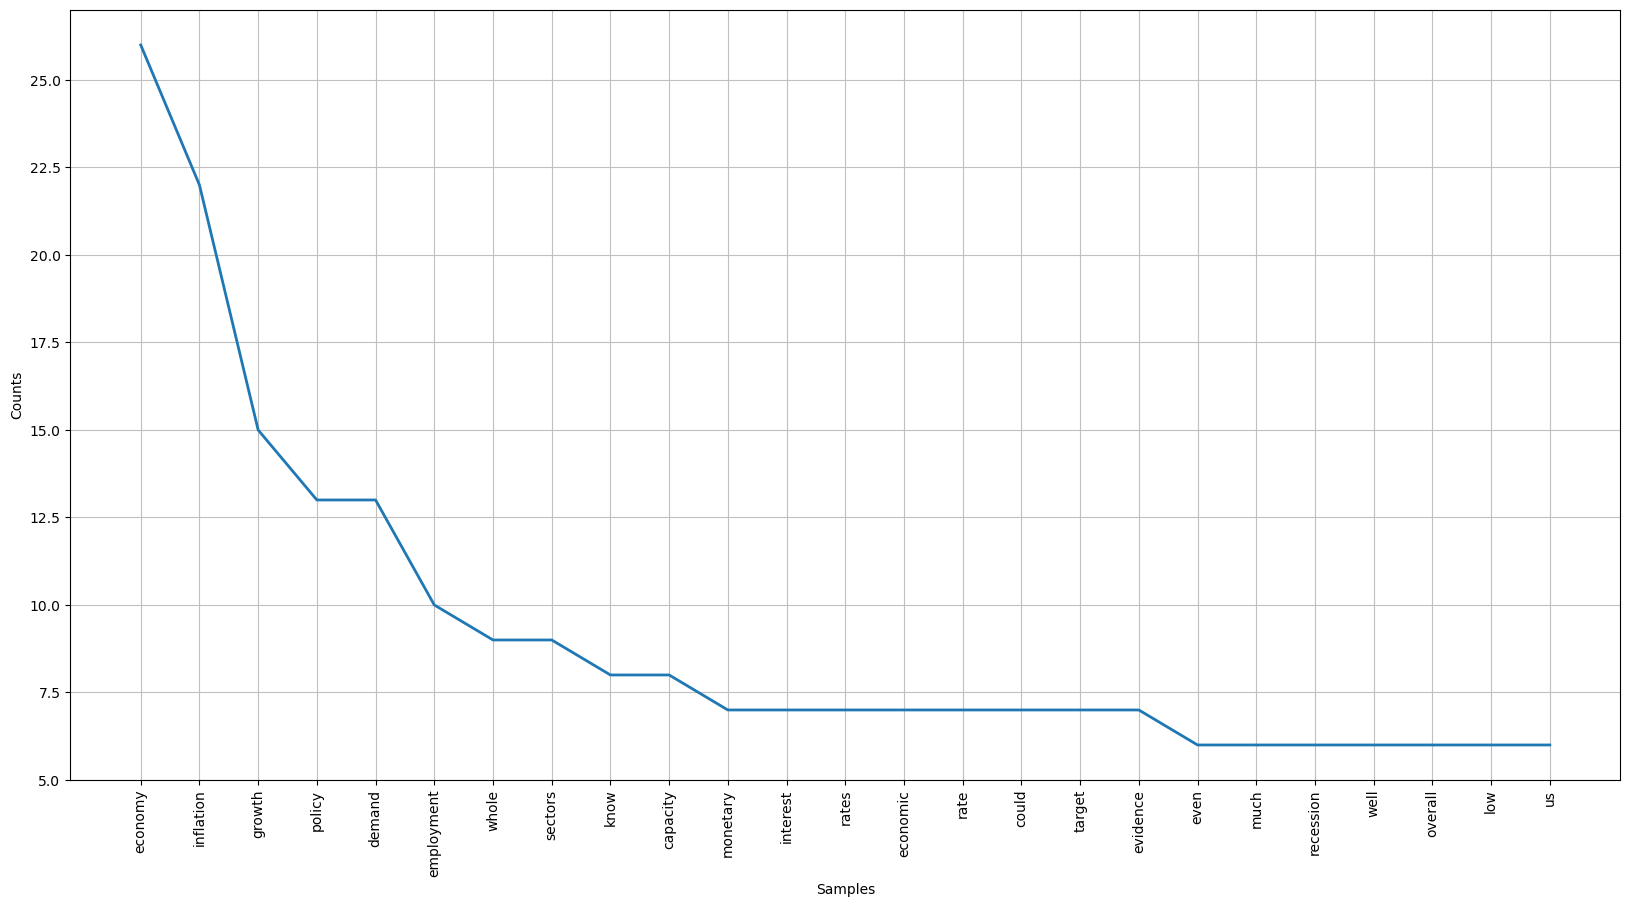

In [13]:
# Set plotting options and plot the data.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(20, 10)
freq_dist_of_words.plot(25, cumulative=False)
plt.show()

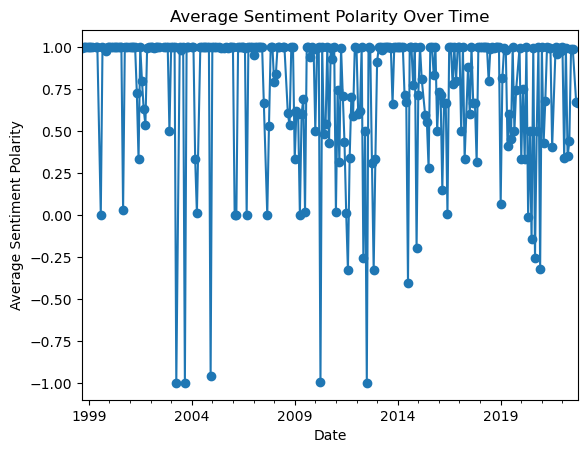

In [14]:
# Convert date column to datetime for time series analysis
dfi['date'] = pd.to_datetime(dfi['date'])

# Group by date (e.g., monthly) and calculate average compound polarity
average_polarity_by_date = dfi.groupby(dfi['date'].dt.to_period("M"))['compound'].mean()

# Plotting
average_polarity_by_date.plot(kind='line', marker='o')
plt.title('Average Sentiment Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.show()

In [15]:
dfi[['compound', 'polarity', 'subjectivity']].describe()

,compound,polarity,subjectivity
count,1209.000000,1209.000000,1209.000000
mean,0.734933,0.096886,0.414278
std,0.661643,0.030716,0.035202
min,-1.000000,0.004528,0.292822
25%,0.996600,0.077628,0.393499
50%,0.999400,0.093191,0.415362
75%,0.999800,0.111018,0.435962
max,1.000000,0.346667,0.628889


### Step 1: Load the Lexicon List

In [16]:
import pandas as pd

# Load the lexicon file
lexicon_path = '/Users/orkestro/Downloads/LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist (1).xlsx'  # Replace with your file path
lexicon_df = pd.read_excel(lexicon_path)

# Display the first few rows to verify it's loaded correctly
print(lexicon_df.head())

           Word  Negative  Positive  Uncertainty  Litigious  Strong  Weak  \
0       ABANDON         1         0            0          0       0     0   
1     ABANDONED         1         0            0          0       0     0   
2    ABANDONING         1         0            0          0       0     0   
3   ABANDONMENT         1         0            0          0       0     0   
4  ABANDONMENTS         1         0            0          0       0     0   

   Constraining  
0             0  
1             0  
2             0  
3             0  
4             0  


In [17]:
# Convert lexicon DataFrame to dictionary
lexicon_dict = lexicon_df.set_index('Word').T.to_dict()

In [18]:
NEGATION_WORDS = {
    "NOT", "NO", "NEVER", "NONE", "NOTHING", "NEITHER", "NOWHERE",
    "NOBODY", "HARDLY", "SCARCELY", "BARELY", "DOESN'T", "ISN'T",
    "WASN'T", "SHOULDN'T", "WOULDN'T", "COULDN'T", "WON'T",
    "CAN'T", "DON'T", "AIN'T", "FAIL", "WITHOUT", "LACK", "VOID",
    "EXCEPT", "ABSENT", "MISSING", "EXCLUDE", "BUT", "STOP", "REFUSE",
    "DENY", "REJECT", "DECLINE", "AVOID", "RESIST", "HINDER"
}

def calculate_lexicon_sentiment(text, lexicon):
    raw_sentiment_score = 0
    words_matched = 0

    words = text.split()
    i = 0
    while i < len(words):
        word = words[i].upper()

        # Check for negation and handle the next word
        if i + 1 < len(words) and word in NEGATION_WORDS:
            next_word = words[i + 1].upper()
            if next_word in lexicon:
                word_scores = lexicon[next_word]
                # Invert the sentiment score
                raw_sentiment_score -= (word_scores['Positive'] - word_scores['Negative'] +
                                        word_scores['Uncertainty'] + word_scores['Litigious'] +
                                        word_scores['Strong'] - word_scores['Weak'] - 
                                        word_scores['Constraining'])
                words_matched += 1
                i += 2  # Skip the next word
                continue

        if word in lexicon:
            word_scores = lexicon[word]
            raw_sentiment_score += (word_scores['Positive'] - word_scores['Negative'] +
                                    word_scores['Uncertainty'] + word_scores['Litigious'] +
                                    word_scores['Strong'] - word_scores['Weak'] - 
                                    word_scores['Constraining'])
            words_matched += 1

        i += 1

    normalized_sentiment_score = raw_sentiment_score / words_matched if words_matched > 0 else 0
    return raw_sentiment_score, normalized_sentiment_score

In [19]:
# Apply the sentiment analysis and split the results into two columns
dfi[['raw_lexicon_sentiment', 'normalized_lexicon_sentiment']] = dfi['text'].apply(
    lambda x: calculate_lexicon_sentiment(x, lexicon_dict)
).apply(pd.Series)

In [20]:
with pd.option_context('display.max_columns', None):  # None means all columns will be shown
    print(dfi)

         reference         country       date  \
0     r980915a_BOE  united kingdom 1998-09-15   
1     r981021b_BOE  united kingdom 1998-10-21   
2     r981021a_BOE  united kingdom 1998-10-21   
3     r981101a_BOE  united kingdom 1998-11-01   
4     r981101b_BOE  united kingdom 1998-11-01   
...            ...             ...        ...   
1204  r221007a_BOE  united kingdom 2022-10-07   
1205  r221012a_BOE  united kingdom 2022-10-12   
1206  r221015a_BOE  united kingdom 2022-10-15   
1207  r221019a_BOE  united kingdom 2022-10-19   
1208  r221020a_BOE  united kingdom 2022-10-20   

                                                  title     author  is_gov  \
0                                                Speech     george       0   
1                                     Britain in Europe     george       0   
2     Impact of the recent turbulence in internation...       king       1   
3           Economic policy, with and without forecasts       budd       0   
4     Inflation targe

In [22]:
statistics_raw = dfi['raw_lexicon_sentiment'].describe()
print(statistics_raw)

count    1209.000000
mean       30.599669
std        61.822395
min      -478.000000
25%         3.000000
50%        28.000000
75%        57.000000
max       740.000000
Name: raw_lexicon_sentiment, dtype: float64


In [23]:
statistics_normalized = dfi['normalized_lexicon_sentiment'].describe()
print(statistics_normalized)

count    1209.000000
mean        0.141167
std         0.187595
min        -0.374065
25%         0.010563
50%         0.132979
75%         0.259386
max         0.761194
Name: normalized_lexicon_sentiment, dtype: float64


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Reshape data for MinMaxScaler
raw_sentiment_values = dfi['raw_lexicon_sentiment'].values.reshape(-1, 1)

# Initialize the MinMaxScaler to scale between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the raw sentiment values
dfi['scaled_raw_lexicon_sentiment'] = scaler.fit_transform(raw_sentiment_values)

# Now you can compare these scaled values directly with VADER scores

In [25]:
# Assuming dfi is your DataFrame and it now contains columns 'raw_lexicon_sentiment' and 'scaled_raw_lexicon_sentiment'
print(dfi[['raw_lexicon_sentiment', 'scaled_raw_lexicon_sentiment']].head())

   raw_lexicon_sentiment  scaled_raw_lexicon_sentiment
0                    8.0                     -0.201970
1                   48.0                     -0.136289
2                   10.0                     -0.198686
3                   32.0                     -0.162562
4                   47.0                     -0.137931


In [26]:
print(dfi['scaled_raw_lexicon_sentiment'].describe())

count    1209.000000
mean       -0.164861
std         0.101515
min        -1.000000
25%        -0.210181
50%        -0.169130
75%        -0.121511
max         1.000000
Name: scaled_raw_lexicon_sentiment, dtype: float64


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Reshape data for MinMaxScaler
normalized_sentiment_values = dfi['normalized_lexicon_sentiment'].values.reshape(-1, 1)

# Initialize the MinMaxScaler to scale between -1 and 1
scaler = MinMaxScalebr(feature_range=(-1, 1))

# Scale the normalized sentiment values
dfi['scaled_normalized_lexicon_sentiment'] = scaler.fit_transform(normalized_sentiment_values)

# Now you can compare these scaled values directly with VADER scoresb

In [28]:
print(dfi[['normalized_lexicon_sentiment', 'scaled_normalized_lexicon_sentiment']].head())

   normalized_lexicon_sentiment  scaled_normalized_lexicon_sentiment
0                      0.055944                            -0.242448
1                      0.175824                            -0.031254
2                      0.066225                            -0.224335
3                      0.125490                            -0.119928
4                      0.156146                            -0.065921


In [29]:
print(dfi['scaled_normalized_lexicon_sentiment'].describe())

count    1209.000000
mean       -0.092310
std         0.330488
min        -1.000000
25%        -0.322396
50%        -0.106735
75%         0.115958
max         1.000000
Name: scaled_normalized_lexicon_sentiment, dtype: float64


**Here's a concise summary focusing on the mean for each set:**

Raw Lexicon Sentiment: This measure, calculated based on a custom lexicon, had a mean value of 30.60. This suggests a generally positive sentiment, as higher scores indicate more positive sentiment.

Normalized Lexicon Sentiment: After normalizing the raw sentiment scores to account for the number of words matched in the lexicon, the mean sentiment score was 0.141. This normalized score also leans toward a positive sentiment on average, with values closer to 0 indicating neutrality.

Scaled Raw Lexicon Sentiment: Using the MinMaxScaler to scale the raw lexicon sentiment scores between -1 and 1, the mean scaled value was -0.165. This slightly negative mean score contrasts with the raw lexicon sentiment, possibly due to the scaling process emphasizing the range of sentiment.

Scaled Normalized Lexicon Sentiment: Similarly, the normalized lexicon sentiment scores were scaled between -1 and 1, resulting in a mean of -0.092. This score is closer to zero, indicating a more neutral sentiment on average after scaling.

## Time Series Analysis - [NORMALISED]

In [51]:
# Convert the index back to a column if necessary
dfi.reset_index(inplace=True)

# Now 'date' is a column and you can convert it to datetime without an error
dfi['date'] = pd.to_datetime(dfi['date'])

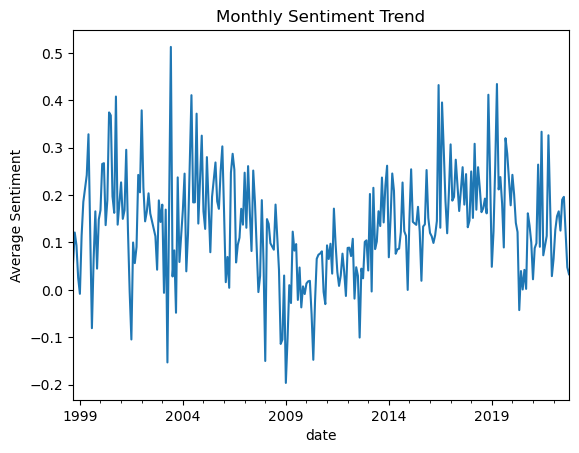

In [101]:
import matplotlib.pyplot as pltb
import seaborn as sns

# Convert 'date' to datetime and set it as the index
dfi['date'] = pd.to_datetime(dfi['date'])
dfi.set_index('date', inplace=True)

# Resample and calculate the mean sentiment for each month
monthly_sentiment = dfi.resample('M')['normalized_lexicon_sentiment'].mean()

# Interpolate missing values
monthly_sentiment_interpolated = monthly_sentiment.interpolate(method='linear')

# Plot the time series
monthly_sentiment_interpolated.plot(kind='line')
plt.title('Monthly Sentiment Trend')
plt.ylabel('Average Sentiment')
plt.show()

In [57]:
# Convert the index back to a column if necessary
dfi.reset_index(inplace=True)

# Now 'date' is a column and you can convert it to datetime without an error
dfi['date'] = pd.to_datetime(dfi['date'])

## Time Series Analysis - [RAW]

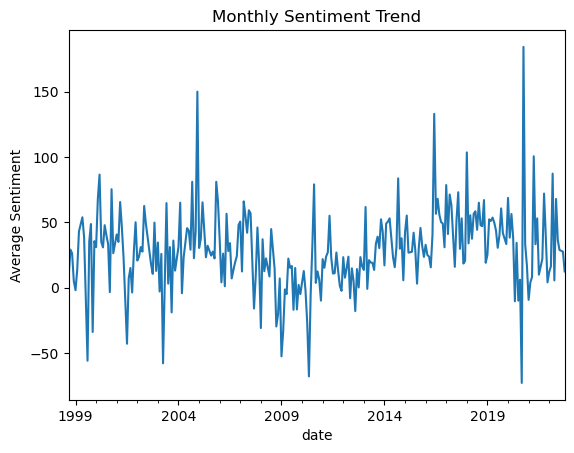

In [58]:
import matplotlib.pyplot as pltb
import seaborn as sns

# Convert 'date' to datetime and set it as the index
dfi['date'] = pd.to_datetime(dfi['date'])
dfi.set_index('date', inplace=True)

# Resample and calculate the mean sentiment for each month
monthly_sentiment = dfi.resample('M')[raw_lexicon_sentiment'].mean()

# Interpolate missing values
monthly_sentiment_interpolated = monthly_sentiment.interpolate(method='linear')

# Plot the time series
monthly_sentiment_interpolated.plot(kind='line')
plt.title('Monthly Sentiment Trend')
plt.ylabel('Average Sentiment')
plt.show()

## Sentiment Score Distribution

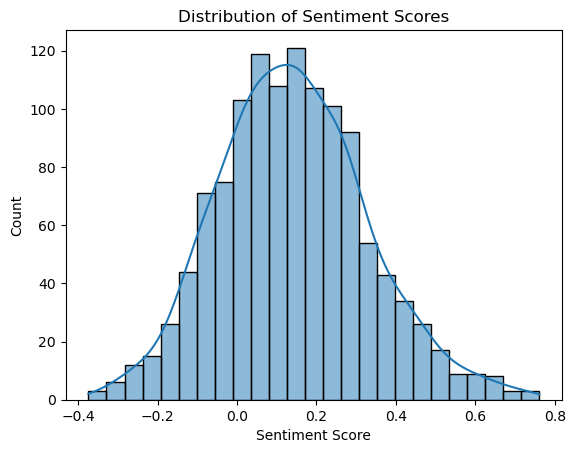

In [53]:
sns.histplot(dfi['normalized_lexicon_sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

## Sentiment Comparison by Author

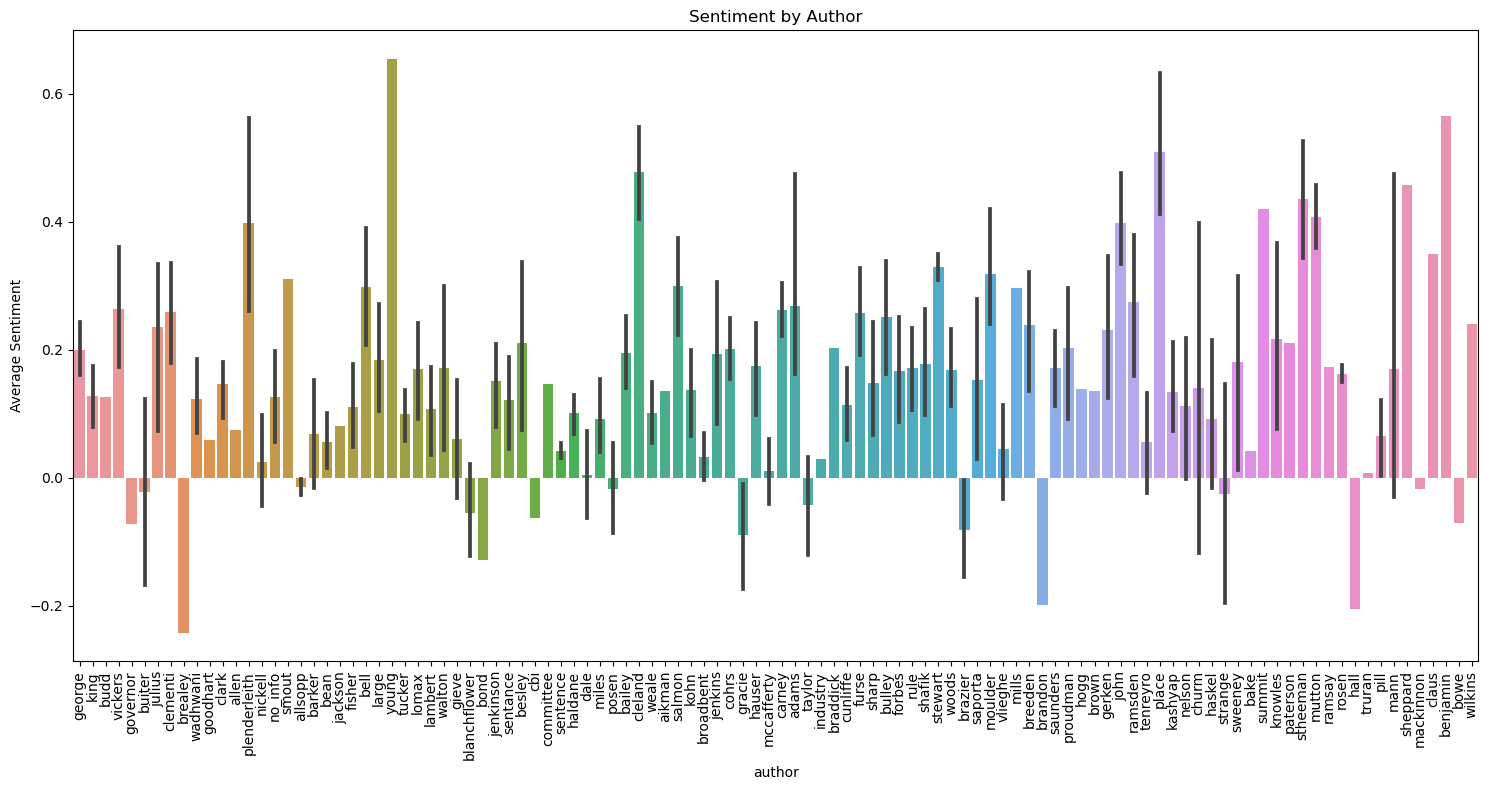

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))  # Increase the figure size
sns.barplot(x='author', y='normalized_lexicon_sentiment', data=dfi)
plt.title('Sentiment by Author')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)  # Rotate the labels to be vertical
plt.tight_layout()  # Adjust the plot to fit into the figure area nicely
plt.show()

## Top positive and negative authors

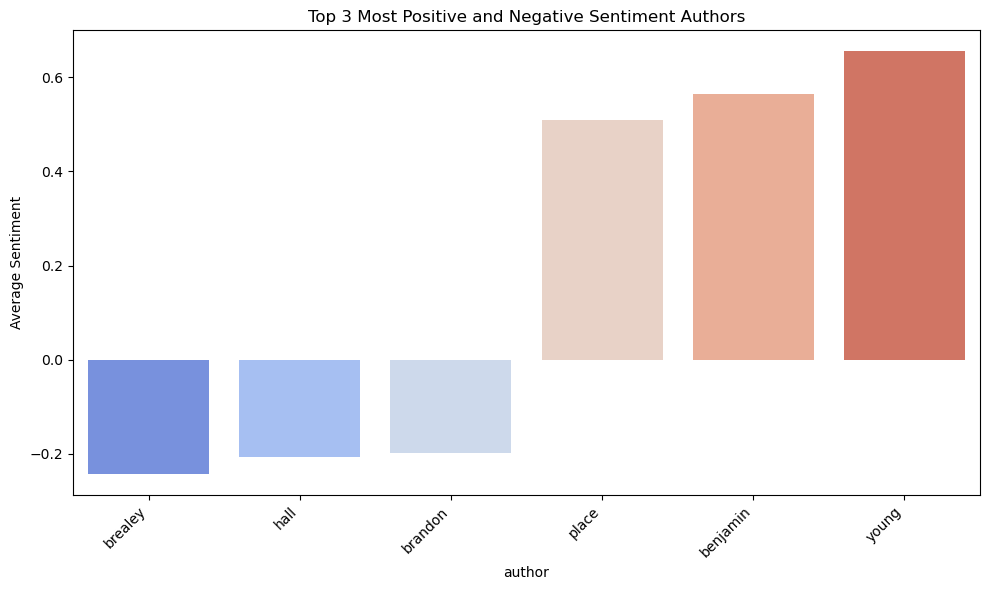

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average sentiment for each author
author_sentiment = dfi.groupby('author')['normalized_lexicon_sentiment'].mean().reset_index()

# Sort the authors by sentiment
sorted_authors = author_sentiment.sort_values(by='normalized_lexicon_sentiment')

# Get the top 3 most positive and top 3 most negative sentiment authors
top_positive_authors = sorted_authors[-3:]
top_negative_authors = sorted_authors[:3]

# Combine the top positive and negative authors into one DataFrame
top_authors = pd.concat(b[top_positive_authors, top_negative_authors]).sort_values(by='normalized_lexicon_sentiment')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='author', y='normalized_lexicon_sentiment', data=top_authors, palette="coolwarm")
plt.title('Top 3 Most Positive and Negative Sentiment Authors')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better readability
plt.tight_layout()  # Fit the plot nicely into the figure area
plt.show()

In [62]:
import pandas as pd

# Creating a DataFrame for the financial events
data = {
    "Year": [
        1997, 1999, 2001, 2007, 2009, 2016, 2017, 2020, 2007, 2008, 2012, 2015,
        2010, 2015, 2017, 2019, 2020, 2004, 2013, 2014, 2022, 1997, 1999, 2001, 
        2001, 2006, 2008, 2010, 2018, 2020, 2004, 2007, 2014, 2015, 2015, 2018, 
        2002, 2010, 2015, 2022
    ],
    "Event": [
        "Bank of England Independence", "Dot-com Bubble", "Financial Services Authority Regulation",
        "Global Financial Crisis", "Quantitative Easing", "Brexit Referendum", "Article 50 Triggered",
        "Brexit Transition Period", "Northern Rock Crisis", "UK Recession", "London Olympics",
        "Pension Reforms", "General Elections", "General Elections", "General Elections", 
        "General Elections", "COVID-19 Economic Response", "Financial Services Compensation Scheme",
        "Prudential Regulation Authority and Financial Conduct Authority Establishment", 
        "Bank of England Funding for Lending Scheme", "Credit Guarantee Scheme for Small Businesses",
        "Asian Financial Crisis", "Euro Introduction", "September 11 Attacks", "Enron Scandal",
        "US Housing Market Crash", "Lehman Brothers Collapse", "European Sovereign Debt Crisis",
        "US-China Trade War", "COVID-19 Pandemic", "European Expansion", "European Expansion",
        "Global Oil Price Fluctuations", "US Financial Regulations Post-2008", "Greek Debt Crisis",
        "US Interest Rate Hikes", "Sarbanes-Oxley Act Introduction", "Basel III Capital Requirements",
        "Paris Agreement on Climate Change", "War in Ukraine"
    ],
    "Impact": [
        "BoE granted independence in setting interest rates", 
        "Impacted UK tech stocks and the wider economy",
        "Major changes in financial regulation",
        "Significant impact on UK banks and the economy",
        "BoE introduced quantitative easing to stimulate the economy",
        "UK voted to leave the European Union, leading to uncertainty",
        "Start of formal Brexit negotiations",
        "End of the transition period post-Brexit",
        "First major UK bank run during the global financial crisis",
        "Triggered by the global financial crisis, significant downturn",
        "Economic implications through infrastructure development and tourism",
        "Major changes in pension regulations affecting retirement savings",
        "Political shifts with economic implications",
        "Political shifts with economic implications",
        "Political shifts with economic implications",
        "Political shifts with economic implications",
        "Fiscal policies and economic measures in response to the pandemic",
        "Launched to protect consumers if a financial firm fails",
        "New regulators of the financial services industry in the UK",
        "Encourage banks to lend to businesses",
        "Support small businesses during the COVID-19 pandemic",
        "Affected global economic stability",
        "Launch of the Euro currency; significant for UK trade relations",
        "Global economic impacts, including on the UK",
        "Affected global confidence in corporate governance",
        "Precipitated the global financial crisis",
        "A key moment in the global financial crisis",
        "Impacted Eurozone countries, with wider global effects",
        "Created global economic tensions",
        "Major global health crisis with significant economic impacts",
        "EU enlargement impacted trade and economic policies",
        "EU enlargement impacted trade and economic policies",
        "Significant changes in oil prices affected global and UK economies",
        "Changes in US financial regulation post-crisis impacted global banking",
        "Part of the Eurozone crisis, affecting European and global markets",
        "Federal Reserve’s policy changes impact global capital flows",
        "Changes in corporate governance around the world, including in the UK",
        "Led to banks having to hold more capital, impacting the UK banking sector",
        "Growing focus on sustainable finance in the UK and around the world",
        "Significant impact on the global economy, higher energy prices and inflation"
    ]
}

# Create DataFrame
financial_events_df = pd.DataFrame(data)

In [63]:
# Saving DataFrame to Excel file
excel_path = 'Financial_Events_1997_to_2022.xlsx'
financial_events_df.to_excel(excel_path, index=False)

print(f"Financial events data saved to {excel_path}")

Financial events data saved to Financial_Events_1997_to_2022.xlsx


In [64]:
# Since we need to add estimated dates for all events, let's define a function to estimate dates
# The function will assign an estimated date based on the event description or default to January 1st of the event year

def estimate_date(year, event):
    event_date_estimates = {
        "Bank of England Independence": "1997-05-06",
        "Dot-com Bubble": "2000-03-10",
        "Financial Services Authority Regulation": "2001-12-01",
        "Global Financial Crisis": "2008-09-15",
        "Quantitative Easing": "2009-03-05",
        "Brexit Referendum": "2016-06-23",
        "Article 50 Triggered": "2017-03-29",
        "Brexit Transition Period": "2020-12-31",
        "Northern Rock Crisis": "2007-09-14",
        "UK Recession": "2008-10-01",
        "London Olympics": "2012-07-27",
        "Pension Reforms": "2015-04-06",
        "COVID-19 Economic Response": "2020-03-11",
        "Financial Services Compensation Scheme": "2001-12-01",
        "Prudential Regulation Authority and Financial Conduct Authority Establishment": "2013-04-01",
        "Bank of England Funding for Lending Scheme": "2012-07-01",
        "Credit Guarantee Scheme for Small Businesses": "2020-03-01",
        "Asian Financial Crisis": "1997-07-01",
        "Euro Introduction": "1999-01-01",
        "September 11 Attacks": "2001-09-11",
        "Enron Scandal": "2001-10-01",
        "US Housing Market Crash": "2007-08-01",
        "Lehman Brothers Collapse": "2008-09-15",
        "European Sovereign Debt Crisis": "2010-05-01",
        "US-China Trade War": "2018-07-06",
        "COVID-19 Pandemic": "2020-03-11",
        "European Expansion": "2004-05-01",
        "Global Oil Price Fluctuations": "2014-06-01",
        "US Financial Regulations Post-2008": "2010-07-21",
        "Greek Debt Crisis": "2010-04-01",
        "US Interest Rate Hikes": "2015-12-16",
        "Sarbanes-Oxley Act Introduction": "2002-07-30",
        "Basel III Capital Requirements": "2010-12-01",
        "Paris Agreement on Climate Change": "2015-12-12",
        "War in Ukraine": "2022-02-24",
        # Additional general elections are assumed to have taken place in May of the respective years
        "General Elections": str(year) + "-05-06"
    }
    # If the event is in our estimates dictionary, return the corresponding date, otherwise return January 1st of that year
    return event_date_estimates.get(event, f"{year}-01-01")

# Apply the function to each row in the DataFrame
financial_events_df['Estimated Date'] = financial_events_df.apply(lambda row: estimate_date(row['Year'], row['Event']), axis=1)

# Convert the 'Estimated Date' to datetime format
financial_events_df['Estimated Date'] = pd.to_datetime(financial_events_df['Estimated Date'])

# Display the DataFrame to verify the changes
financial_events_df.head()

,Year,Event,Impact,Estimated Date
0,1997,Bank of England Independence,BoE granted independence in setting interest r...,1997-05-06
1,1999,Dot-com Bubble,Impacted UK tech stocks and the wider economy,2000-03-10
2,2001,Financial Services Authority Regulation,Major changes in financial regulation,2001-12-01
3,2007,Global Financial Crisis,Significant impact on UK banks and the economy,2008-09-15
4,2009,Quantitative Easing,BoE introduced quantitative easing to stimulat...,2009-03-05


In [65]:
# Assuming the DataFrame 'financial_events_df' has been created and the 'Estimated Date' column added,
# we'll print the entire DataFrame to check if all rows have estimated dates.

# This will print the entire DataFrame without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(financial_events_df)


    Year                                              Event  \
0   1997                       Bank of England Independence   
1   1999                                     Dot-com Bubble   
2   2001            Financial Services Authority Regulation   
3   2007                            Global Financial Crisis   
4   2009                                Quantitative Easing   
5   2016                                  Brexit Referendum   
6   2017                               Article 50 Triggered   
7   2020                           Brexit Transition Period   
8   2007                               Northern Rock Crisis   
9   2008                                       UK Recession   
10  2012                                    London Olympics   
11  2015                                    Pension Reforms   
12  2010                                  General Elections   
13  2015                                  General Elections   
14  2017                                  General Elect

In [84]:
# Assuming dfi is your DataFrame and the index is of datetime type
start_date = dfi.index.min()
end_date = dfi.index.max()

print(f"The date range of the sentiment scores is from {start_date} to {end_date}")

The date range of the sentiment scores is from 1998-09-15 00:00:00 to 2022-10-20 00:00:00


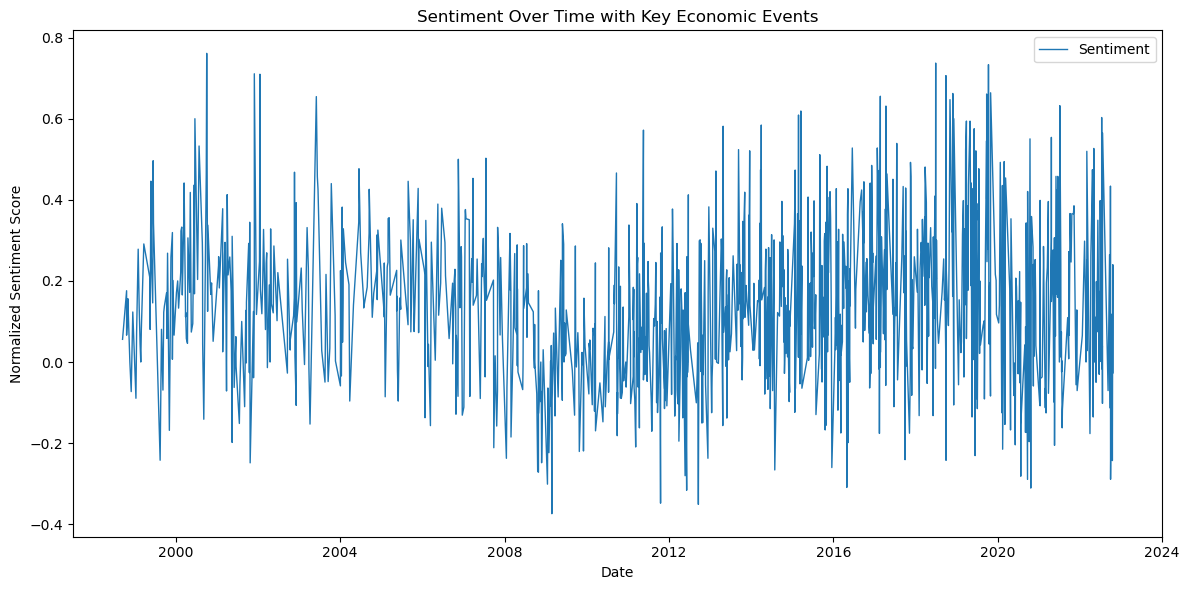

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
# Also assuming the DataFrame is sorted by date

# Sample economic crises that occurred within the date range of your dataset
economic_crises = {
    'Dot-com Bubble Burst': '2000-03-10',
    'Financial Crisis Start': '2007-08-09',
    'Lehman Brothers Collapse': '2008-09-15',
    'European Debt Crisis Peak': '2011-08-05',
    'COVID-19 Pandemic Start': '2020-03-11',
}

# Convert strings to datetime
economic_crises = {k: pd.to_datetime(v) for k, v in economic_crises.items()}

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the sentiment over time
plt.plot(dfi.index, dfi['normalized_lexicon_sentiment'], label='Sentiment', linewidth=1)

# Annotate economic crises
for crisis, date in economic_crises.items():
    if date in dfi.index:
        plt.axvline(x=date, color='red', linestyle='--', alpha=0.5)
        plt.text(x=date, y=dfi['normalized_lexicon_sentiment'].min(), s=crisis, rotation=90, verticalalignment='bottom')

# Improve the aesthetics
plt.title('Sentiment Over Time with Key Economic Events')
plt.xlabel('Date')
plt.ylabel('Normalized Sentiment Score')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


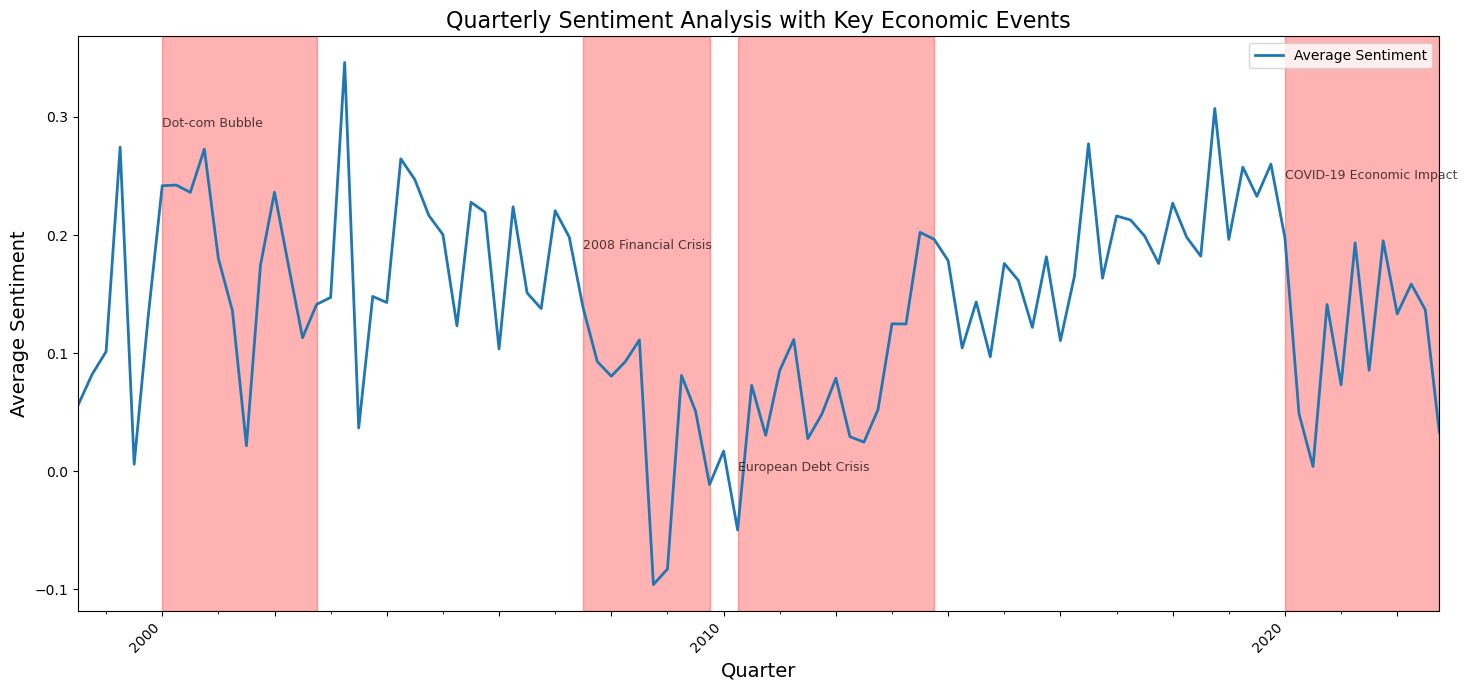

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
dfi['quarter'] = dfi.index.to_period('Q')
quarterly_sentiment = dfi.groupby('quarter')['normalized_lexicon_sentiment'].mean()

# Define the periods of key economic crises
crises_periods = {
    '2008 Financial Crisis': ('2007Q3', '2009Q4'),
    'Dot-com Bubble': ('2000Q1', '2002Q4'),
    'European Debt Crisis': ('2010Q2', '2013Q4'),
    'Asian Financial Crisis': ('1997Q2', '1999Q4'),
    'COVID-19 Economic Impact': ('2020Q1', '2022Q4')  # Adjust the end quarter as needed
}

# Plot settings
plt.figure(figsize=(15, 7))

# Plot quarterly sentiment
quarterly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Annotate and shade periods of crises
for crisis, (start, end) in crises_periods.items():
    if start in quarterly_sentiment.index and end in quarterly_sentiment.index:
        plt.axvspan(start, end, color='red', alpha=0.3)
        plt.text(x=start, y=quarterly_sentiment.loc[start] + 0.05, s=crisis, 
                 fontsize=9, color='black', alpha=0.7)

# Set major ticks format and labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Quarterly Sentiment Analysis with Key Economic Events', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [89]:
# Check the column names in dfi DataFrame
print(dfi.columns)

Index(['reference', 'country', 'title', 'author', 'is_gov', 'text', 'len',
       'neg', 'neu', 'pos', 'compound', 'polarity', 'subjectivity',
       'raw_lexicon_sentiment', 'normalized_lexicon_sentiment',
       'scaled_raw_lexicon_sentiment', 'scaled_normalized_lexicon_sentiment',
       'event_flag', 'quarter'],
      dtype='object')


In [90]:
# Convert the index back to a column if necessary
dfi.reset_index(inplace=True)

# Now 'date' is a column and you can convert it to datetime without an error
dfi['date'] = pd.to_datetime(dfi['date'])

In [92]:
# Assuming dfi is the sentiment analysis DataFrame with 'date' and 'scaled_lexicon_sentiment' columns,
# and financial_events_df is the DataFrame with 'Estimated Date' and 'Event' columns.

# First, create a DataFrame to store events and their corresponding sentiment scores
event_sentiments = []

# Loop through each event in the financial events DataFrame
for index, event_row in financial_events_df.iterrows():
    event_date = event_row['Estimated Date']
    event_name = event_row['Event']
    
    # Find sentiment scores for speeches within a window around the event date
    # Here we define a window of 7 days before and after the event
    window_start = event_date - pd.Timedelta(days=7)
    window_end = event_date + pd.Timedelta(days=7)
    
    # Filter dfi for speeches within the window and calculate the average sentiment
    window_sentiments = dfi[(dfi['date'] >= window_start) & (dfi['date'] <= window_end)]
    average_sentiment = window_sentiments['normalized_lexicon_sentiment'].mean()
    
    # Add the event name, date, and average sentiment to the list
    event_sentiments.append({
        'Event': event_name,
        'Date': event_date,
        'Average Sentiment': average_sentiment
    })

# Convert the list of event sentiments to a DataFrame
event_sentiments_df = pd.DataFrame(event_sentiments)

# Sort the events by date
event_sentiments_df = event_sentiments_df.sort_values(by='Date')

# Print the event sentiments DataFrame
print(event_sentiments_df)

                                                Event       Date  \
0                        Bank of England Independence 1997-05-06   
21                             Asian Financial Crisis 1997-07-01   
22                                  Euro Introduction 1999-01-01   
1                                      Dot-com Bubble 2000-03-10   
23                               September 11 Attacks 2001-09-11   
24                                      Enron Scandal 2001-10-01   
2             Financial Services Authority Regulation 2001-12-01   
17             Financial Services Compensation Scheme 2001-12-01   
36                    Sarbanes-Oxley Act Introduction 2002-07-30   
30                                 European Expansion 2004-05-01   
31                                 European Expansion 2004-05-01   
25                            US Housing Market Crash 2007-08-01   
8                                Northern Rock Crisis 2007-09-14   
26                           Lehman Brothers Col

In [82]:
!pip install gensim

In [93]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Select a sample of the data
sample_docs = dfi['text'].sample(100)  # Adjust the number of samples as needed

# Preprocess the sample documents
processed_docs = sample_docs.map(preprocess)

# Preview the processed documents
print(processed_docs[:10])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


315     [good, even, ladi, gentlemen, delight, opportu...
923     [good, afternoon, welcom, bank, england, today...
1198    [intern, credit, assess, assign, fundament, sp...
952     [andrew, work, long, time, weve, use, adopt, r...
278     [global, economi, inflat, good, even, ladi, ge...
367     [delight, opportun, speak, royal, holloway, ev...
906     [ask, reflect, tonight, leadership, valu, some...
491     [pleasur, particip, annual, gather, global, tr...
828     [good, afternoon, like, thank, committe, chair...
733     [shakespear, famous, play, depict, number, com...
Name: text, dtype: object


In [94]:
# Create a dictionary from 'processed_docs' containing the number of times a word appears
dictionary = gensim.corpora.Dictionary(processed_docs)

# Filter out tokens that appear in less than 15 documents or more than 0.5 documents (fraction of total corpus size)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Create a bag-of-words model for each document i.e., the frequency of each word in the document
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [95]:
# Set the number of topics
num_topics = 10

# LDA model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=2)

# For each topic, we will explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.015*"chart" + 0.013*"recoveri" + 0.012*"recess" + 0.010*"forecast" + 0.007*"shock" + 0.007*"labour" + 0.006*"employ" + 0.006*"capac" + 0.006*"consum" + 0.006*"survey"
Topic: 1 
Words: 0.029*"hour" + 0.016*"payment" + 0.010*"particip" + 0.010*"week" + 0.010*"labour" + 0.008*"system" + 0.007*"chart" + 0.006*"employ" + 0.005*"insur" + 0.005*"relationship"
Topic: 2 
Words: 0.019*"deposit" + 0.014*"mortgag" + 0.014*"spread" + 0.012*"fund" + 0.011*"yield" + 0.011*"lend" + 0.011*"consumpt" + 0.010*"curv" + 0.010*"bond" + 0.008*"purchas"
Topic: 3 
Words: 0.026*"labour" + 0.026*"unemploy" + 0.013*"employ" + 0.012*"chart" + 0.009*"wage" + 0.009*"worker" + 0.007*"shock" + 0.007*"declin" + 0.006*"aggreg" + 0.006*"equilibrium"
Topic: 4 
Words: 0.011*"leverag" + 0.011*"ratio" + 0.009*"reform" + 0.009*"regul" + 0.007*"client" + 0.007*"collater" + 0.007*"chart" + 0.006*"recess" + 0.005*"lend" + 0.005*"regulatori"
Topic: 5 
Words: 0.025*"money" + 0.017*"payment" + 0.014*"technolog" +

In [96]:
# Select the document to analyze
document_num = 20  # Adjust the document number as needed
bow_vector = bow_corpus[document_num]

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.9977879524230957	 Topic: 0.011*"resolut" + 0.009*"resili" + 0.008*"regul" + 0.007*"regim" + 0.007*"author"


In [97]:
pip install nltk gensim

Note: you may need to restart the kernel to use updated packages.


In [98]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/orkestro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orkestro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
import pandas as pd
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Make sure to have your data loaded into the 'dfi' DataFrame and the 'date' column is in datetime format.

# Preprocess the text function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Apply preprocessing to the text column
dfi['processed_text'] = dfi['text'].apply(preprocess_text)

# Group the speeches by year
grouped = dfi.groupby(dfi['date'].dt.year)

# Dictionary to hold corpora for each year
yearly_corpora = {}

for year, group in grouped:
    # Create a dictionary and corpus for each year
    dictionary = corpora.Dictionary(group['processed_text'])
    corpus = [dictionary.doc2bow(text) for text in group['processed_text']]
    
    # Save the dictionary and corpus in a dictionary keyed by year
    yearly_corpora[year] = (dictionary, corpus)
    
    # Build LDA model for each year
    lda_model = models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
    
    # Print topics for each year
    print(f"Year: {year}")
    for idx, topic in lda_model.print_topics(-1):
        print('Topic: {} \nWords: {}'.format(idx, topic))
    print("\n" + "="*50 + "\n")

Year: 1998
Topic: 0 
Words: 0.008*"inflation" + 0.006*"policy" + 0.005*"rate" + 0.004*"monetary" + 0.004*"growth" + 0.003*"economy" + 0.003*"target" + 0.003*"would" + 0.002*"economic" + 0.002*"central"
Topic: 1 
Words: 0.010*"economy" + 0.009*"monetary" + 0.009*"policy" + 0.008*"euro" + 0.008*"growth" + 0.007*"inflation" + 0.007*"economic" + 0.007*"would" + 0.007*"rate" + 0.006*"financial"
Topic: 2 
Words: 0.012*"inflation" + 0.009*"growth" + 0.008*"earnings" + 0.007*"markets" + 0.007*"mpc" + 0.006*"financial" + 0.006*"policy" + 0.006*"market" + 0.005*"monetary" + 0.005*"year"
Topic: 3 
Words: 0.027*"inflation" + 0.012*"policy" + 0.008*"target" + 0.007*"mpc" + 0.007*"rate" + 0.007*"one" + 0.007*"would" + 0.006*"function" + 0.006*"forecast" + 0.005*"model"
Topic: 4 
Words: 0.008*"inflation" + 0.006*"policy" + 0.005*"rate" + 0.005*"monetary" + 0.004*"economy" + 0.004*"economic" + 0.003*"growth" + 0.003*"would" + 0.003*"euro" + 0.003*"financial"
Topic: 5 
Words: 0.019*"inflation" + 0.015*

In [100]:
import pandas as pd

# DataFrame to hold all topic weights for each year
topics_over_time = pd.DataFrame()

for year, group in grouped:
    # Create a dictionary and corpus for each year
    dictionary = corpora.Dictionary(group['processed_text'])
    corpus = [dictionary.doc2bow(text) for text in group['processed_text']]
    
    # Build LDA model for each year
    lda_model = models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
    
    # Extract topics with weights
    year_topics = {year: {}}
    for idx, topic in lda_model.print_topics(-1):
        words_weights = topic.split("+")
        # Extract weight for each word and sum to get an overall weight for the topic
        topic_weight = sum(float(weight.split("*")[0]) for weight in words_weights)
        year_topics[year][f"Topic {idx}"] = topic_weight
    
    # Convert the dictionary to a DataFrame and append to the topics_over_time DataFrame
    year_topic_df = pd.DataFrame.from_dict(year_topics, orient='index')
    topics_over_time = topics_over_time.append(year_topic_df)

# Reset index to turn 'Year' into a column
topics_over_time.reset_index(inplace=True)
topics_over_time.rename(columns={'index': 'Year'}, inplace=True)


/var/folders/yb/8hcnccns5wjbsxnc659ycvsm0000gn/T/ipykernel_33905/1752354703.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_over_time = topics_over_time.append(year_topic_df)
/var/folders/yb/8hcnccns5wjbsxnc659ycvsm0000gn/T/ipykernel_33905/1752354703.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_over_time = topics_over_time.append(year_topic_df)
/var/folders/yb/8hcnccns5wjbsxnc659ycvsm0000gn/T/ipykernel_33905/1752354703.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_over_time = topics_over_time.append(year_topic_df)
/var/folders/yb/8hcnccns5wjbsxnc659ycvsm0000gn/T/ipykernel_33905/1752354703.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

In [102]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# We drop the 'Year' to scale only the topic weights and then add it back
year = topics_over_time['Year']
scaled_data = scaler.fit_transform(topics_over_time.drop('Year', axis=1))
scaled_topics_over_time = pd.DataFrame(scaled_data, columns=topics_over_time.columns[1:])
scaled_topics_over_time['Year'] = year

<Axes: ylabel='Year'>

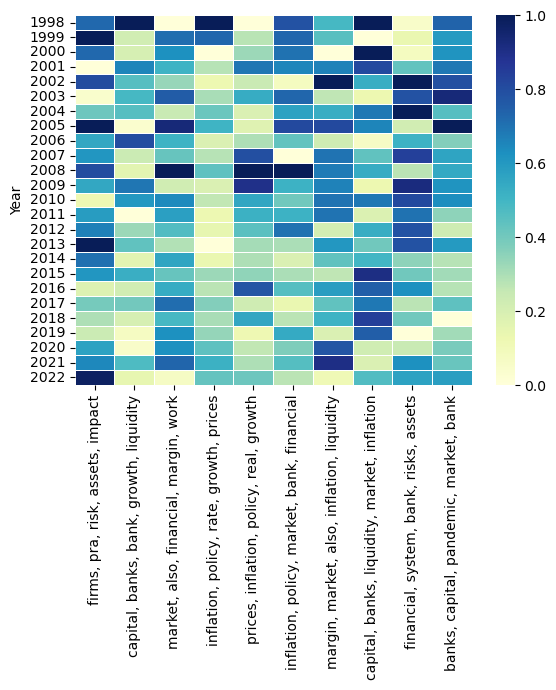

In [104]:
# Pseudo-code
top_words_per_topic = {}
for idx, topic in lda_model.show_topics(formatted=False, num_words=5):
    top_words_per_topic[f"Topic {idx}"] = ", ".join([word for word, prop in topic])

# Modify the columns of the DataFrame that will be used in the heatmap
for old_topic_name, new_topic_name in top_words_per_topic.items():
    if old_topic_name in scaled_topics_over_time.columns:
        scaled_topics_over_time.rename(columns={old_topic_name: new_topic_name}, inplace=True)

# Then create the heatmap using the new column names which contain the top words
sns.heatmap(scaled_topics_over_time.set_index('Year'), cmap="YlGnBu", linewidths=.5)
# rest of the plotting code remains the same

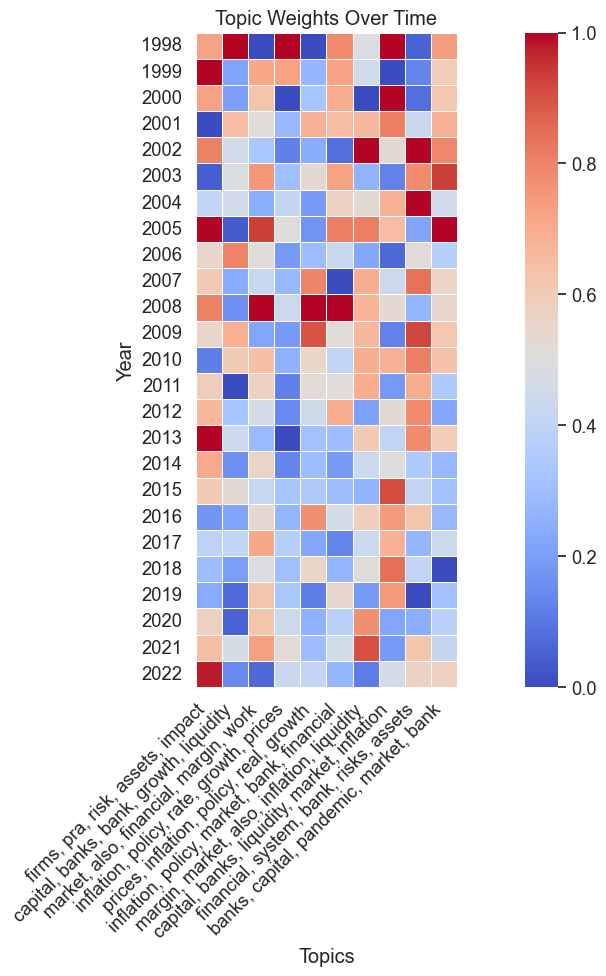

In [105]:
plt.figure(figsize=(14, 10))  # Adjust the size to fit your needs
sns.set(font_scale=1.2)  # Adjust font_scale to fit your needs

# Generate the heatmap
ax = sns.heatmap(
    scaled_topics_over_time.set_index('Year'),
    cmap="coolwarm",  # A different color map for better contrast
    linewidths=.5,
    annot=False,  # Change to True if you want to annotate cells
    fmt=".2f",  # The format of the annotation if annot=True
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Topic Weights Over Time')
plt.xlabel('Topics')
plt.ylabel('Year')

# Adjust the aspect ratio to make sure each cell is square-shaped if needed
ax.set_aspect("equal")

# Show the plot
plt.tight_layout()  # Adjust the plot to fit into the figure area nicely
plt.show()